Logistic Acc: 0.7532467532467533
Linear  Acc: 0.7532467532467533
Linear  MSE: 0.17113033279525355


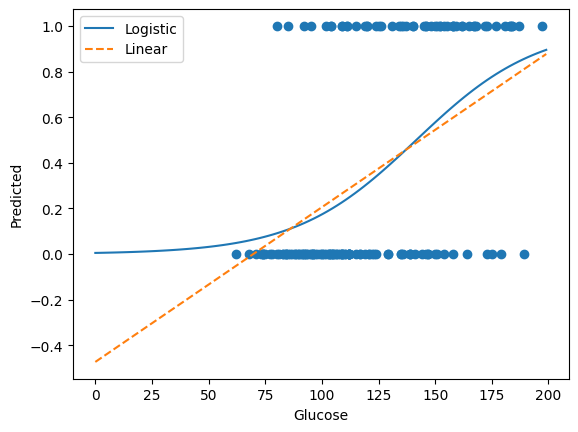

In [8]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
X = df[["Glucose"]].values; y = df["Outcome"].values

# Split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit both models
log = LogisticRegression().fit(X_train, y_train)
lin = LinearRegression().fit(X_train, y_train)

# Evaluate
print("Logistic Acc:", accuracy_score(y_test, log.predict(X_test)))
print("Linear  Acc:", accuracy_score(y_test, (lin.predict(X_test)>=0.5).astype(int)))
print("Linear  MSE:", mean_squared_error(y_test, lin.predict(X_test)))

# 5-line plotting
xs = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.scatter(X_test, y_test)
plt.plot(xs, log.predict_proba(xs)[:,1], label="Logistic")
plt.plot(xs, lin.predict(xs), "--", label="Linear")
plt.legend(); plt.xlabel("Glucose"); plt.ylabel("Predicted"); plt.show()